# Individual Assignment 2

## 11.3

In [49]:
# Import required packages for this chapter
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor

import matplotlib.pylab as plt

from dmba import regressionSummary

%matplotlib inline

In [50]:
# load the data
car_df = pd.read_csv('C:/Users/김예지/OneDrive/바탕 화면/대학원/1-1\비지니스인텔리전스와데이터마이닝/2021-2 BI-DM Python Code and Data/ToyotaCorolla.csv')
# select the suggested variables
selected_var = ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 
                'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 
                'Powered_Windows', 'Sport_Model', 'Tow_Bar']
car_df = car_df[selected_var]

In [51]:
# convert the categorical data into dummy variables
categorical_var = ['Fuel_Type']
car_df = pd.get_dummies(car_df, columns=['Fuel_Type'], drop_first=True)

# separate out predictors and response variables
X_df = car_df.drop(columns=['Price'])
Y_df = car_df[ ['Price'] ]

In [52]:
# normalize the data 
scaleInput = MinMaxScaler()
scaleOutput = MinMaxScaler()
X = scaleInput.fit_transform(X_df)      # before partitioning
y = scaleOutput.fit_transform(Y_df)

In [53]:
# range [1,2] 만들기

scaler = MinMaxScaler()

In [54]:
scaler.fit(car_df)
print(scaler.n_samples_seen_, scaler.data_min_, scaler.data_max_, scaler.feature_range)


1436 [4.35e+03 1.00e+00 1.00e+00 6.90e+01 0.00e+00 2.00e+00 1.90e+01 0.00e+00
 3.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00] [3.25e+04 8.00e+01 2.43e+05 1.92e+02 1.00e+00 5.00e+00 2.83e+02 1.00e+00
 3.60e+01 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
 1.00e+00] (0, 1)


In [55]:
car_df1 = scaler.transform(car_df)

In [56]:
car_df1

array([[0.3250444 , 0.27848101, 0.19335471, ..., 0.        , 1.        ,
        0.        ],
       [0.3339254 , 0.27848101, 0.30014938, ..., 0.        , 1.        ,
        0.        ],
       [0.3410302 , 0.29113924, 0.1716468 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.14742451, 0.88607595, 0.07002086, ..., 0.        , 0.        ,
        1.        ],
       [0.10301954, 0.87341772, 0.06960934, ..., 0.        , 0.        ,
        1.        ],
       [0.09236234, 0.94936709, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [57]:
# partition data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=12345)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((861, 16), (575, 16), (861, 1), (575, 1))

In [58]:
# train neural network with 2 hidden nodes
car_nnet = MLPRegressor(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train.ravel())     # ravel() numpy fnc. 2 dim => 1 dim    # numpy flatten()

MLPRegressor(activation='logistic', hidden_layer_sizes=2, random_state=1,
             solver='lbfgs')

Training data (2)
(861,)
(861,)

Regression statistics

                      Mean Error (ME) : 1.4720
       Root Mean Squared Error (RMSE) : 1067.2968
            Mean Absolute Error (MAE) : 798.5035
          Mean Percentage Error (MPE) : 0.0232
Mean Absolute Percentage Error (MAPE) : 7.7100

Validation data (2)

Regression statistics

                      Mean Error (ME) : -76.9962
       Root Mean Squared Error (RMSE) : 1134.6333
            Mean Absolute Error (MAE) : 851.7910
          Mean Percentage Error (MPE) : -0.9009
Mean Absolute Percentage Error (MAPE) : 8.3696


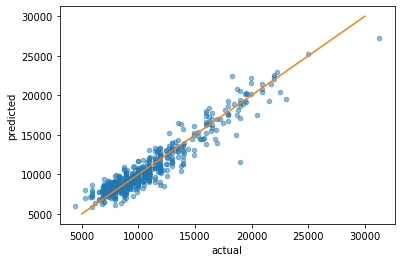

In [59]:
# RMSE for training set
print('Training data (2)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_train)]).ravel()

# added
print(y_actual.shape)
print(y_pred.shape)

regressionSummary(y_pred, y_actual)

# RMSE for validation set
print('\nValidation data (2)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1')
plt.show()

Training data (1)
(861,)
(861,)

Regression statistics

                      Mean Error (ME) : -0.2543
       Root Mean Squared Error (RMSE) : 1124.7143
            Mean Absolute Error (MAE) : 834.6269
          Mean Percentage Error (MPE) : -0.0126
Mean Absolute Percentage Error (MAPE) : 8.0039

Validation data (1)

Regression statistics

                      Mean Error (ME) : -64.6465
       Root Mean Squared Error (RMSE) : 1162.4429
            Mean Absolute Error (MAE) : 882.9386
          Mean Percentage Error (MPE) : -0.7088
Mean Absolute Percentage Error (MAPE) : 8.5996


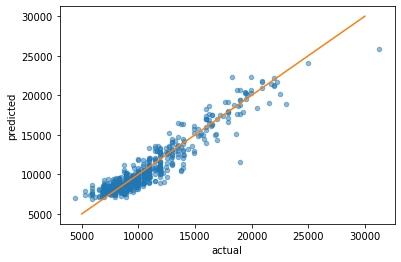

In [61]:
car_nnet = MLPRegressor(hidden_layer_sizes=(1), activation='logistic', solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train.ravel())

print('Training data (1)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_train)]).ravel()

print(y_actual.shape)
print(y_pred.shape)

regressionSummary(y_pred, y_actual)

print('\nValidation data (1)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1')
plt.show()

Training data (2)
(861,)
(861,)

Regression statistics

                      Mean Error (ME) : -0.2543
       Root Mean Squared Error (RMSE) : 1124.7143
            Mean Absolute Error (MAE) : 834.6269
          Mean Percentage Error (MPE) : -0.0126
Mean Absolute Percentage Error (MAPE) : 8.0039

Validation data (2)

Regression statistics

                      Mean Error (ME) : -64.6465
       Root Mean Squared Error (RMSE) : 1162.4429
            Mean Absolute Error (MAE) : 882.9386
          Mean Percentage Error (MPE) : -0.7088
Mean Absolute Percentage Error (MAPE) : 8.5996


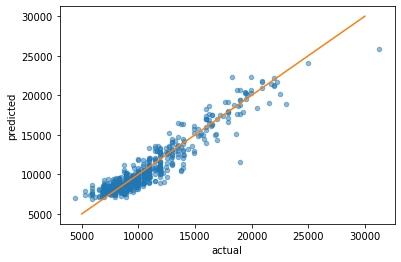

In [62]:
car_nnet = MLPRegressor(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train.ravel()) 

print('Training data (2)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_train)]).ravel()

print(y_actual.shape)
print(y_pred.shape)

regressionSummary(y_pred, y_actual)


print('\nValidation data (2)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1')
plt.show()

Training data (3)
(861,)
(861,)

Regression statistics

                      Mean Error (ME) : -1.2190
       Root Mean Squared Error (RMSE) : 1061.9106
            Mean Absolute Error (MAE) : 808.7437
          Mean Percentage Error (MPE) : 0.0057
Mean Absolute Percentage Error (MAPE) : 7.8026

Validation data (3)

Regression statistics

                      Mean Error (ME) : -88.7092
       Root Mean Squared Error (RMSE) : 1133.0452
            Mean Absolute Error (MAE) : 862.1977
          Mean Percentage Error (MPE) : -0.9528
Mean Absolute Percentage Error (MAPE) : 8.4505


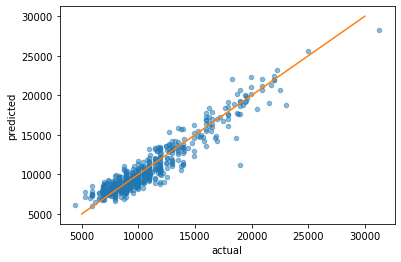

In [63]:
car_nnet = MLPRegressor(hidden_layer_sizes=(3), activation='logistic', solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train.ravel())

print('Training data (3)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_train)]).ravel()

print(y_actual.shape)
print(y_pred.shape)

regressionSummary(y_pred, y_actual)

print('\nValidation data (3)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1')
plt.show()

Training data (4)
(861,)
(861,)

Regression statistics

                      Mean Error (ME) : 0.9941
       Root Mean Squared Error (RMSE) : 1068.7470
            Mean Absolute Error (MAE) : 799.8110
          Mean Percentage Error (MPE) : -0.0632
Mean Absolute Percentage Error (MAPE) : 7.7481

Validation data (4)

Regression statistics

                      Mean Error (ME) : -61.2590
       Root Mean Squared Error (RMSE) : 1136.4723
            Mean Absolute Error (MAE) : 853.7606
          Mean Percentage Error (MPE) : -0.8780
Mean Absolute Percentage Error (MAPE) : 8.4589


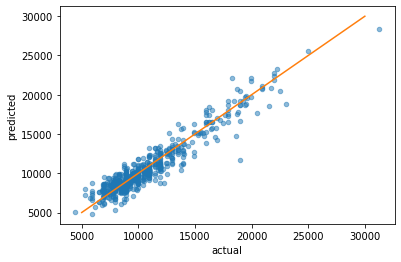

In [64]:
car_nnet = MLPRegressor(hidden_layer_sizes=(4), activation='logistic', solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train.ravel())

print('Training data (4)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_train)]).ravel()

print(y_actual.shape)
print(y_pred.shape)

regressionSummary(y_pred, y_actual)

print('\nValidation data (4)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1')
plt.show()

Training data (5)
(861,)
(861,)

Regression statistics

                      Mean Error (ME) : -2.6509
       Root Mean Squared Error (RMSE) : 1054.4521
            Mean Absolute Error (MAE) : 790.7841
          Mean Percentage Error (MPE) : -0.0747
Mean Absolute Percentage Error (MAPE) : 7.6910

Validation data (5)

Regression statistics

                      Mean Error (ME) : -75.4804
       Root Mean Squared Error (RMSE) : 1129.4348
            Mean Absolute Error (MAE) : 850.5533
          Mean Percentage Error (MPE) : -0.9898
Mean Absolute Percentage Error (MAPE) : 8.4278


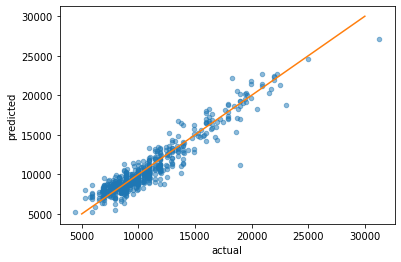

In [65]:

car_nnet = MLPRegressor(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train.ravel())

print('Training data (5)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_train)]).ravel()

print(y_actual.shape)
print(y_pred.shape)

regressionSummary(y_pred, y_actual)

print('\nValidation data (5)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

ax = pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1')
plt.show()

## i. 
## 1
## (RMSE) : 1124.7143
## 2
## (RMSE) : 1124.7143
## 3
## (RMSE) : 1061.9106
## 4 
## (RMSE) : 1068.7470
## 5
## (RMSE) : 1054.4521

## train set에서 hidden layer 수가 증가할수록 RMSE 값은 점점 감소하는 추세를 보인다.

## ii.
## 1
## (RMSE) : 1162.4429
## 2
## (RMSE) : 1162.4429
## 3
## (RMSE) : 1133.0452
## 4
## (RMSE) : 1136.4723
## 5
## (RMSE) : 1129.4348

## validation set에서 hidden layer 수가 증가할수록 RMSE 값은 점점 감소하는 추세를 보인다.

## iii
## hidden layer 수가 3개일때 RMSE가 감소했다 4번째에 살짝 증가하기 때문에 3번째가 적절해보인다.

## 14.4

In [22]:
cos_df = pd.read_csv('C:/Users/김예지/OneDrive/바탕 화면/대학원/1-1\비지니스인텔리전스와데이터마이닝/2021-2 BI-DM Python Code and Data/Cosmetics.csv')


### a
#### table 16.15 에서 1 row를 보면 bag와 eyebrow pencils의 값이 0 이고 나머지가 다 1인 것을 볼 수 있다. 이는 bag 컬럼을 보았을때 bag 이 구매되지 않으면 eyebrow pencils를 제외하고 모든 물건들이 구매된다는 것을 알 수 있다. 또한 대부분 blush와 nail polish의 값이 반대가 된다. 이는 blush를 구매하면 nail polish을 구매하지 않고 nail polish를 구매하면 blush를 구매하지 않는 것을 알 수 있다. 따라서 이는 연관성이 높다고 볼 수 있다. nail polish와 brushes도 마찬가지 이다. brushes와 concealer은 brushes가 1일때도 concealer는 1이거나 brushes가 0일때도 concealer는 1인 패턴이 많이 보이기 때문에 서로 연관성이 없어 보인다. 

    

### b
#### i. confidence는 여러개의 transaction 중에 해당 lhs 를 포함하는 것을 기준으로 (100%로) 해당하는 rhs 의 개수의 확률을 나타낸다. 첫번째 row 에서 confidence는 여러 개의 transaction 중에서 Blush, Concealer, Mascara, Eye shadow, Lipstick 를 포함하는 transaction을 전체집합으로 생각하고 이 중에서 몇개가 eyebrow pencils를 포함하는지 보는 것이다.   Blush, Concealer, Mascara, Eye shadow, Lipstick 를 동시에 구매한 사람 중에 eyebrow pencils를 구매한 사람의 비율은 0.3023 이 나온 것이다. 이를 수식으로 표현하면 suport(Blush, Concealer, Mascara, Eye shadow, Lipstick,  eyebrow pencils)/suport(Blush, Concealer, Mascara, Eye shadow, Lipstick )
#### ii. support는 전체 transaction중에서 lhs와 rhs를 구매한 비율이다. 첫번째 row 에서 전제 transaction 중에서  Blush, Concealer, Mas cara, Eye shadow, Lipstick 과 eyebrow pencils를 구매한 비율은 0.013 이다. 이를 수식으로 표현하면 n( Blush, Concealer, Mascara, Eye shadow, Lipstick, eyebrow pencils) / N 이다.
#### iii. lift: confidence/(benchmark confidence). lift는 lhs가 주어지지 않았을 때의 rhs의 확률 대비 lhs가 주어졌을 대 rhs의 확률 증가 비율이다. lhs와 rhs가 서로 독립이면 lift는 1이다. 첫번째 row 의 lift는 약 7.198 이다.
#### iv. Blush, Concealer, Mascara, Eye shadow, Lipstick을 구매할때  eyebrow pencils을 구매할 것인가를 나타낸다. lift가 1이상인것으로 보아 이들의 연관성은 높다고 판단된다. 하지만 confidence가 약 0.302 이기 때문에 Blush, Concealer, Mascara, Eye shadow, Lipstick을 구매할때  eyebrow pencils을 동시에 구매할 확률은 0.302이다.



# c

In [88]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

itemsets = apriori(cos_df, min_support=0.1, use_colnames=True)


In [89]:
# and convert into rules
rules = association_rules(itemsets, metric='confidence',min_threshold = 0.5)
rules.sort_values(by=['lift'], ascending=False).head(6)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(Brushes),(Nail Polish),0.149,0.280,0.149,1.000000,3.571429,0.107280,inf
7,(Nail Polish),(Brushes),0.280,0.149,0.149,0.532143,3.571429,0.107280,1.818931
130,"(Concealer, Eye shadow)","(Eyeliner, Mascara)",0.201,0.175,0.114,0.567164,3.240938,0.078825,1.906034
127,"(Eyeliner, Mascara)","(Concealer, Eye shadow)",0.175,0.201,0.114,0.651429,3.240938,0.078825,2.292213
122,"(Concealer, Eye shadow)","(Blush, Mascara)",0.201,0.184,0.119,0.592040,3.217608,0.082016,2.000195
118,"(Blush, Mascara)","(Concealer, Eye shadow)",0.184,0.201,0.119,0.646739,3.217608,0.082016,2.261785


## i
### 첫번째는 brush를 구매하면 Nail Polish를 구매할지를 나타낸다. lift 값이 1보다 크기 때문에 brush와 Nail Polish는 연관성이 있다고 볼 수 있다. support는 낮지만 confidence 가 1이므로  brush를 구매하면 Nail Polish를 구매할 가능성이 높다고 할 수 있다.
### 두번째는  Nail Polish를 구매하면 brush를 구매할지를 나타낸다. 이 역시 lift 값이 1보다 크기 때문에  Nail Polish와  Brush는 연관성이 있다고 볼 수 있다. support는 낮지만 confidence 가 0.5정도 나온다.   Nail Polish를 구매하면 brush를  구매할 가능성이 적당하다 할 수 있다.
### 세번째는 Concealer, Eye shadow를 구매하면 Eyeliner, Mascara를 구매할지를 나타낸다. lift 값이 1보다 크기 때문에  Concealer, Eye shadow와  Eyeliner, Mascara는 연관성이 있다고 볼 수 있다.  support는 낮지만 confidence 가 0.5정도 나온다.   Concealer, Eye shadow를 구매하면 Eyeliner, Mascara를 구매할 가능성이 적당하다 할 수 있다.




In [90]:
# and convert into rules
rules = association_rules(itemsets, metric='confidence',min_threshold = 0.5)
rules.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(Brushes),(Nail Polish),0.149,0.280,0.149,1.000000,3.571429,0.107280,inf
7,(Nail Polish),(Brushes),0.280,0.149,0.149,0.532143,3.571429,0.107280,1.818931
130,"(Concealer, Eye shadow)","(Eyeliner, Mascara)",0.201,0.175,0.114,0.567164,3.240938,0.078825,1.906034
127,"(Eyeliner, Mascara)","(Concealer, Eye shadow)",0.175,0.201,0.114,0.651429,3.240938,0.078825,2.292213
122,"(Concealer, Eye shadow)","(Blush, Mascara)",0.201,0.184,0.119,0.592040,3.217608,0.082016,2.000195
...,...,...,...,...,...,...,...,...,...
30,(Lipstick),(Foundation),0.322,0.536,0.167,0.518634,0.967600,-0.005592,0.963923
81,"(Concealer, Eye shadow)",(Foundation),0.201,0.536,0.104,0.517413,0.965323,-0.003736,0.961485
99,"(Mascara, Eye shadow)",(Foundation),0.321,0.536,0.166,0.517134,0.964802,-0.006056,0.960929
90,"(Eyeliner, Concealer)",(Foundation),0.297,0.536,0.152,0.511785,0.954822,-0.007192,0.950400


## ii.
### 비지니스에 유용한 rule을 가지고 redundancy를 감소시킬 수 있는 리뷰 과정이 필요하다. 이를 보기 위해서는 lift와 confidence를 확인하여야 한다. lifr는 대부분 높은 값으로 나온다. 대부분 연관성이 좋다는 것을 알 수 있다. 하지만 confidence는 0.5 정도의 값이 나온다. brush를 구매할때 Nail polish를 구매할 가능성은 lift를 보아 둘이 연관성이 가장 높기 때문에 높을 것으로 예상된다. 따라서 brush를 구매하는 고객이 있다면 이 전에 구매 내력이 없는 고객을 대상으로 Nail polish를 추천하는 시스템을 만들어야 한다. 